In [180]:
import tensorflow as tf
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import Levenshtein as L

In [181]:
# comments like this will be removed
"""
comments like this will be removed
"""
def removeComments(text):
    pattern1 = '\s+#.+'
    pattern2 = '"""((?:.|\n)*?)"""'
    
    text = re.sub(r'\s*#.+', '', text)
    text = re.sub(r'"""((?:.|\n)*?)"""', '', text)
    text = re.sub(r'\'\'\'((?:.|\n)*?)\'\'\'', '', text)

    return text

## load data

In [182]:
codes = {}
for code_file in os.listdir('deid-code/'):
    with open('deid-code/' + code_file) as IN:
        codes[code_file] = IN.read()
        pass

## remove comments

In [183]:
for code in codes:
    codes[code] = removeComments(codes[code])

In [184]:
jaro_distance = []
jaro_distance_dict = {}

levenshtein_distance = []
levenshtein_distance_dict = {}

jaro_winkler_distance = []
jaro_winkler_distance_dict = {}

ratio_distance = []
ratio_distance_dict = {}

for c1 in codes:
    for c2 in codes:
        d1 = L.jaro(codes[c1], codes[c2])
        jaro_distance.append(d1)
        
        d2 = L.distance(codes[c1], codes[c2])
        levenshtein_distance.append(d2)
        
        d3 = L.jaro_winkler(codes[c1], codes[c2])
        jaro_winkler_distance.append(d3)
        
        d4 = L.ratio(codes[c1], codes[c2])
        ratio_distance.append(d4)
        
        if c1 > c2:
            key = c1 + "|" +c2
            jaro_distance_dict[key] = d1
            levenshtein_distance_dict[key] = d2
            jaro_winkler_distance_dict[key] = d3
            ratio_distance_dict[key] = d4

## jaro_distance

[('deid-mahmoud-ssn.py|deid-Jie.py', 0.8139528376399041),
 ('deid-mahmoud-ssn.py|deid-Andre_Holder.py', 0.7986070073439127),
 ('deid-mahmoud-ssn.py|deid-mahmoud-Age.py', 0.797615142338485),
 ('deid-mahmoud-Age.py|deid-Jie.py', 0.7966136315129129),
 ('deid-mahmoud-Age.py|deid-Andre_Holder.py', 0.7935297686406165)]

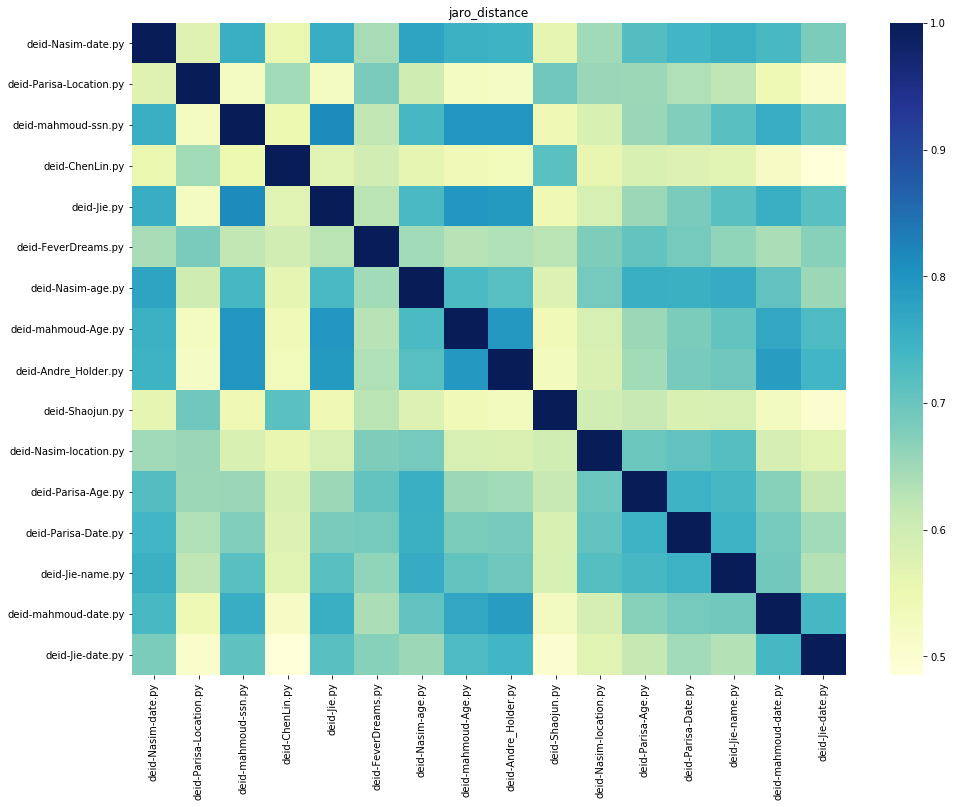

In [187]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes()
sns.heatmap(np.array(jaro_distance).reshape(16,16), 
            xticklabels=codes.keys(), 
            yticklabels=codes.keys(),
            cmap="YlGnBu", ax=ax)
plt.title("jaro_distance")
fig.savefig('jaro_distance.png', dpi=200)

# Top 5 pairs of code similarity based on jaro_distance
sorted(jaro_distance_dict.items(), key=lambda x: x[1], reverse=True)[0:5]

## levenshtein_distance

[('deid-ChenLin.py|deid-Andre_Holder.py', 7554),
 ('deid-mahmoud-ssn.py|deid-ChenLin.py', 7547),
 ('deid-mahmoud-Age.py|deid-ChenLin.py', 7543),
 ('deid-mahmoud-date.py|deid-ChenLin.py', 7481),
 ('deid-Jie.py|deid-ChenLin.py', 7477)]

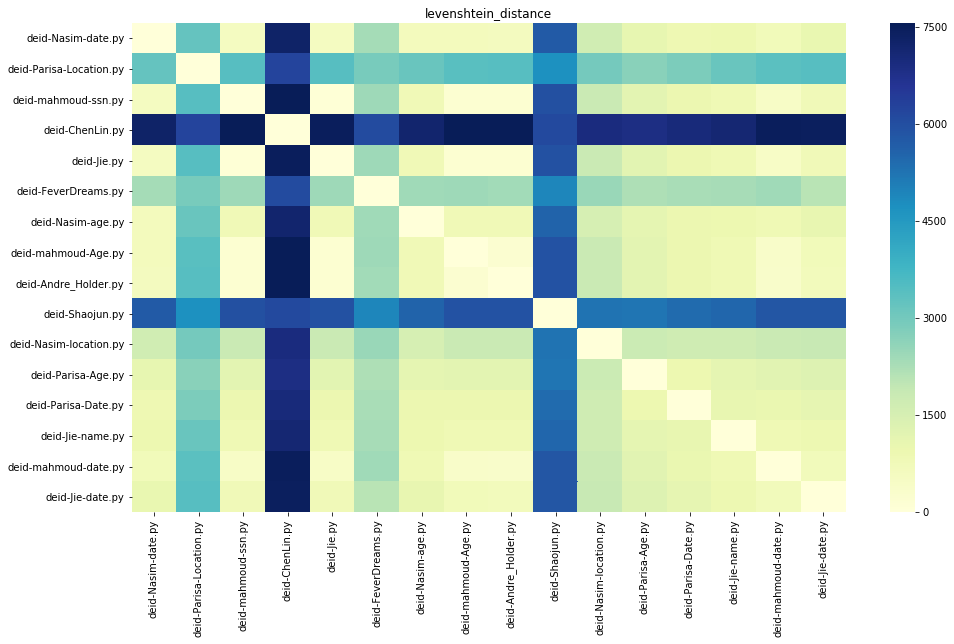

In [177]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes()
sns.heatmap(np.array(levenshtein_distance).reshape(16,16), 
            xticklabels=codes.keys(), 
            yticklabels=codes.keys(),
            cmap="YlGnBu", ax=ax)
plt.title("levenshtein_distance")
fig.savefig('levenshtein_distance.png', dpi=200)


# Top 5 pairs of code similarity based on levenshtein_distance
sorted(levenshtein_distance_dict.items(), key=lambda x: x[1], reverse=True)[0:5]

[('deid-Nasim-date.py|deid-Nasim-age.py', 1.0),
 ('deid-mahmoud-ssn.py|deid-Parisa-Location.py', 1.0),
 ('deid-mahmoud-ssn.py|deid-mahmoud-Age.py', 1.0),
 ('deid-mahmoud-ssn.py|deid-mahmoud-date.py', 1.0),
 ('deid-ChenLin.py|deid-Andre_Holder.py', 1.0)]

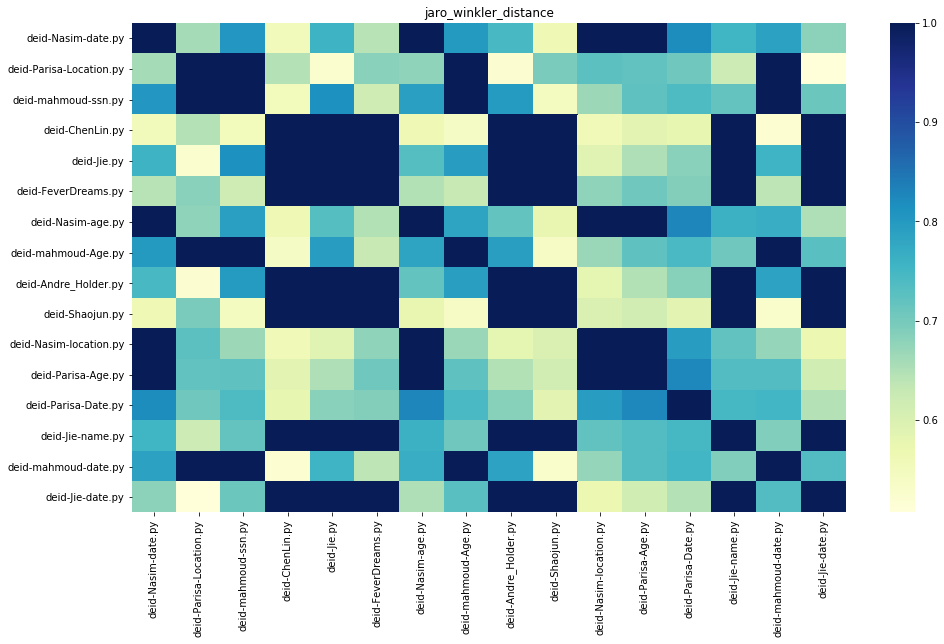

In [178]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes()
sns.heatmap(np.array(jaro_winkler_distance).reshape(16,16), 
            xticklabels=codes.keys(), 
            yticklabels=codes.keys(),
            cmap="YlGnBu", ax=ax)
plt.title("jaro_winkler_distance")
fig.savefig('jaro_winkler_distance.png', dpi=200)


# Top 5 pairs of code similarity based on jaro_winkler_distance
sorted(jaro_winkler_distance_dict.items(), key=lambda x: x[1], reverse=True)[0:5]

[('deid-mahmoud-ssn.py|deid-Jie.py', 0.9655400927766733),
 ('deid-mahmoud-ssn.py|deid-mahmoud-Age.py', 0.9223300970873787),
 ('deid-mahmoud-ssn.py|deid-Andre_Holder.py', 0.9216441875401413),
 ('deid-mahmoud-Age.py|deid-Jie.py', 0.9193341869398207),
 ('deid-Jie.py|deid-Andre_Holder.py', 0.9174078780177891)]

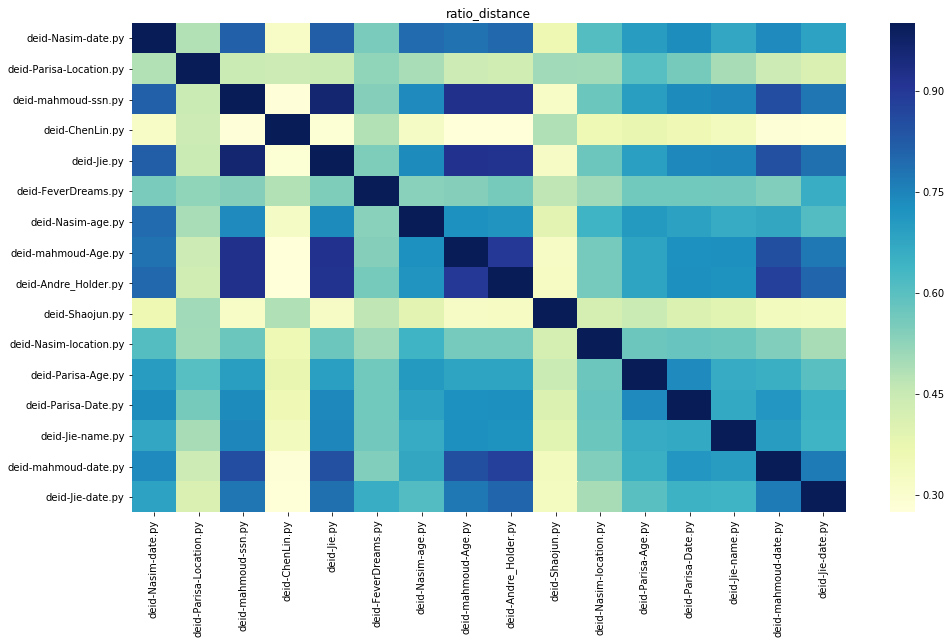

In [179]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes()
sns.heatmap(np.array(ratio_distance).reshape(16,16), 
            xticklabels=codes.keys(), 
            yticklabels=codes.keys(),
            cmap="YlGnBu", ax=ax)
plt.title("ratio_distance")
fig.savefig('ratio_distance.png', dpi=200)


# Top 5 pairs of code similarity based on ratio_distance
sorted(ratio_distance_dict.items(), key=lambda x: x[1], reverse=True)[0:5]